In this notebook , we will get started using Apache's sparke.ml Linear Regression .



In [4]:
import findspark

findspark.init()

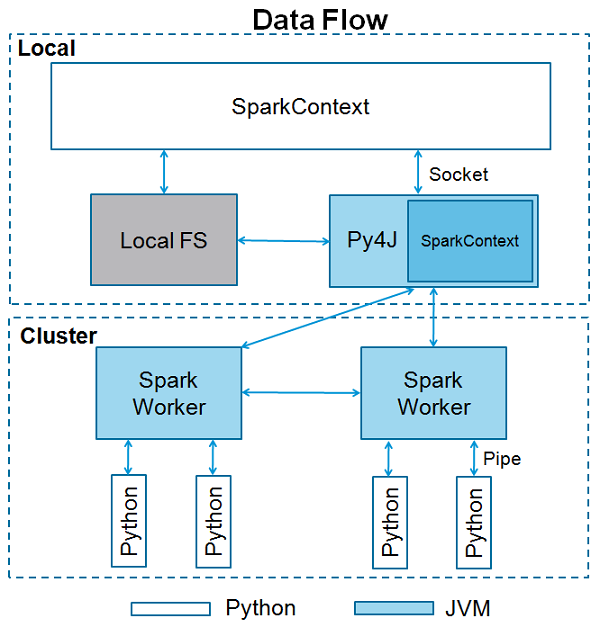

### SparkContext
is the entry point to any spark functionality. When we run any Spark application, a driver program starts, which has the main function and your SparkContext gets initiated here. The driver program then runs the operations inside the executors on worker nodes.

### SQLContext
It's the entry point to Spark SQL .

# Spark MLlib

## MLlib

MLlib is a comprehensive machine learning package that includes categorization, regression, clustering, cooperative filtration, and fundamental optimal primitives, as well as other popular learning methods and tools.

## Why to use spark MLlib for ML

Spark is a strong, centralized platform for data scientists due to its fast speed. It is also a simple to use tool that helps them get desired results quickly. This enables data scientists to fix deep learning complications along with pattern calculation, broadcasting, and interactive request handling at a much larger scale.

R, Python and Java, are just a few of the languages available in Spark. The 2015 Spark Study, which interviewed the Spark community, revealed that Python and R have seen primarily fast growth. In particular, 58 percent of participants said they used Python and 18 percent said they were currently utilising the R API.

## Step 1 . Create a spark session :

In [5]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local").appName("linear_regression_model").getOrCreate()

## Step 2 . Load dataset 

For the dataset , we will use a simple dataset Real Estate dataset from Kaggle , which contains a simple data for real estate with continuous features like distance from mrt station , coordinates , size , etc 

In [6]:
real_estate = spark.read.option("inferShema","true").csv("Real_estate.csv",header=True)

## Step 3 : Explore data and its attribute

PrintSchema() to see the columns with data types 


In [7]:
real_estate.printSchema()

root
 |-- No: string (nullable = true)
 |-- X1 transaction date: string (nullable = true)
 |-- X2 house age: string (nullable = true)
 |-- X3 distance to the nearest MRT station: string (nullable = true)
 |-- X4 number of convenience stores: string (nullable = true)
 |-- X5 latitude: string (nullable = true)
 |-- X6 longitude: string (nullable = true)
 |-- Y house price of unit area: string (nullable = true)



Show() to : used to check out a few rows and understand the data

In [8]:
real_estate.show(2)

+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
| No|X1 transaction date|X2 house age|X3 distance to the nearest MRT station|X4 number of convenience stores|X5 latitude|X6 longitude|Y house price of unit area|
+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
|  1|           2012.917|          32|                              84.87882|                             10|   24.98298|   121.54024|                      37.9|
|  2|           2012.917|        19.5|                              306.5947|                              9|   24.98034|   121.53951|                      42.2|
+---+-------------------+------------+--------------------------------------+-------------------------------+-----------+------------+--------------------------+
only showing top 2 rows



describe() : it's used to see statistics of columns 

In [9]:
real_estate.describe().show()

+-------+-----------------+-------------------+------------------+--------------------------------------+-------------------------------+--------------------+--------------------+--------------------------+
|summary|               No|X1 transaction date|      X2 house age|X3 distance to the nearest MRT station|X4 number of convenience stores|         X5 latitude|        X6 longitude|Y house price of unit area|
+-------+-----------------+-------------------+------------------+--------------------------------------+-------------------------------+--------------------+--------------------+--------------------------+
|  count|              414|                414|               414|                                   414|                            414|                 414|                 414|                       414|
|   mean|            207.5| 2013.1489710144933| 17.71256038647343|                    1083.8856889130436|              4.094202898550725|  24.969030072463745|  121.53336108

## Step 4 : VectorAssembler to transform data into feature columns

In [10]:
from pyspark.sql.functions import col
for col_name in real_estate.columns:
    real_estate= real_estate.withColumn(col_name, col(col_name).cast('float'))

In [11]:
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=[ 
 'X1 transaction date',
 'X2 house age',
 'X3 distance to the nearest MRT station',
 'X4 number of convenience stores',
 'X5 latitude',
 'X6 longitude'],
 outputCol='features')

data_set = assembler.transform(real_estate)
data_set.select(['features','Y house price of unit area']).show(2)

+--------------------+--------------------------+
|            features|Y house price of unit area|
+--------------------+--------------------------+
|[2012.9169921875,...|                      37.9|
|[2012.9169921875,...|                      42.2|
+--------------------+--------------------------+
only showing top 2 rows



## Step 5 : Split into Train and Test set

In [12]:
train_data , test_data = data_set.randomSplit([0.7,0.3])

## Step 6 : Train your model ( Fit the model with train data ) 

In [13]:
from pyspark.ml.regression import LinearRegression
lr=LinearRegression(labelCol='Y house price of unit area')
lrModel = lr.fit(train_data)

## Step 7 : Perform descriptive analysis with correlation 

We will check out the coefficients after validating with the test set 

In [14]:
test_stats =lrModel.evaluate(test_data)
print(f"RMSE:{test_stats.rootMeanSquaredError}")
print(f"R2:{test_stats.r2}")
print(f"R2:{test_stats.meanSquaredError}")


RMSE:8.823341001782378
R2:0.5195776980840091
R2:77.85134643373405


## To conclude 

Spark isn't just a better approach to comprehend our information; it's also a lot faster. Spark transforms data analytics and research by enabling us to handle a wide variety of data challenges in a preferred language. Spark MLlib makes it simple for new data scientists to engage with their models right out of the package and specialists can fine-tune as needed.

Distributed networks could be the subject of data engineers, while machine learning methods and algorithms might be the subject of data scientists. Spark has significantly improved and revolutionized the machine learning by allowing data scientists to concentrate on the data challenges that matter to them while openly utilizing Spark's single system's performance, convenience, and integration.

# Using Pandas

In [66]:
import pandas as pd 
real_estate_df=pd.read_csv('Real_estate.csv')

In [67]:
real_estate_df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [69]:
real_estate_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [68]:
real_estate_df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000
